In [19]:
%pylab inline
import numpy as np
from tqdm import tqdm
import string

# from nltk.corpus import stopwords
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import *
# from sklearn.model_selection import *
# from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
# from sklearn.naive_bayes import *
# from sklearn.metrics import *

import matplotlib.pyplot as plt

# from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Activation, Conv1D, MaxPooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters, imdb
from tensorflow.keras.callbacks import EarlyStopping

Populating the interactive namespace from numpy and matplotlib


## Reuters News classifier w LSTM

In [2]:
reuters.load_data(num_words=1000, test_split=0.2)

((array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
         list([1, 2, 699, 2, 2, 56, 2, 2, 9, 56, 2, 2, 81, 5, 2, 57, 366, 737, 132, 20, 2, 7, 2, 49, 2, 2, 2, 2, 699, 2, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2, 2, 2, 775, 7, 48, 34, 191, 44, 35, 2, 505, 17, 12]),
         list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 2, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 2, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110, 59, 89, 90, 67, 2, 55, 2, 92, 617, 80, 2, 46, 905, 22

In [3]:
(X_train, y_train),(X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [4]:
category = np.max(y_train)+1
category

46

In [5]:
len(X_train), len(X_test)

(8982, 2246)

In [6]:
print(X_train[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [7]:
max([len(row) for row in X_train])

2376

In [8]:
X_train = pad_sequences(X_train, maxlen=100)
X_test = pad_sequences(X_test, maxlen=100)  # paddingto max 100 values per row

In [9]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)  # onehot encoding

In [10]:
model = Sequential()  # model structure
model.add(Embedding(1000,100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # model execution option
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)  # early stopping conditions

In [11]:
%%time
history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stopping_callback])
print("Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/200
450/450 [==============================] - 16s 32ms/step - loss: 2.2018 - accuracy: 0.4385 - val_loss: 1.8568 - val_accuracy: 0.5191
Epoch 2/200
450/450 [==============================] - 13s 30ms/step - loss: 1.7604 - accuracy: 0.5420 - val_loss: 1.7125 - val_accuracy: 0.5708
Epoch 3/200
450/450 [==============================] - 13s 30ms/step - loss: 1.5913 - accuracy: 0.5934 - val_loss: 1.5145 - val_accuracy: 0.6207
Epoch 4/200
450/450 [==============================] - 14s 30ms/step - loss: 1.3516 - accuracy: 0.6592 - val_loss: 1.3423 - val_accuracy: 0.6603
Epoch 5/200
450/450 [==============================] - 14s 32ms/step - loss: 1.1997 - accuracy: 0.6981 - val_loss: 1.2475 - val_accuracy: 0.6843
Epoch 6/200
450/450 [==============================] - 14s 31ms/step - loss: 1.0926 - accuracy: 0.7248 - val_loss: 1.2064 - val_accuracy: 0.6963
Epoch 7/200
450/450 [==============================] - 14s 30ms/step - loss: 0.9933 - accuracy: 0.7463 - val_loss: 1.1420 - val_ac

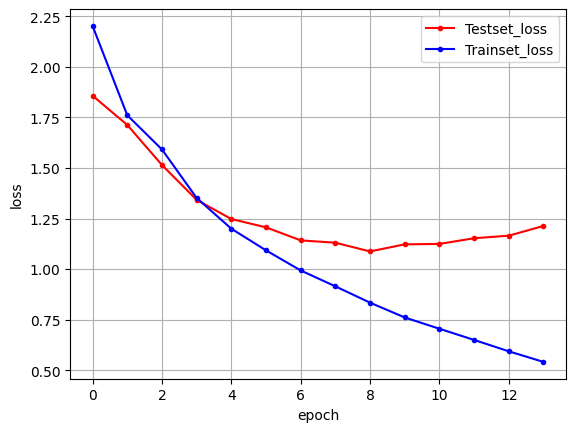

In [12]:
y_vloss = history.history['val_loss']  # save losses for both train and test sets
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## IMDB review classifier w LSTM and CNN

In [17]:
(X_train, y_train),(X_test, y_test) = imdb.load_data(num_words=5000)

17464789/17464789 [==============================] - 1s 0us/step


In [20]:
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

In [21]:
model = Sequential()
model.add(Embedding(5000,100))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

In [22]:
history = model.fit(X_train, y_train, batch_size=40, epochs=100, validation_split=0.25, callbacks=[early_stopping_callback])
print("Test accuracy: %.4f" %(model.evaluate(X_test, y_test)[1]))

Epoch 1/100
469/469 [==============================] - 30s 61ms/step - loss: 0.3777 - accuracy: 0.8232 - val_loss: 0.3251 - val_accuracy: 0.8626
Epoch 2/100
469/469 [==============================] - 28s 59ms/step - loss: 0.2175 - accuracy: 0.9169 - val_loss: 0.2862 - val_accuracy: 0.8762
Epoch 3/100
469/469 [==============================] - 28s 60ms/step - loss: 0.1472 - accuracy: 0.9492 - val_loss: 0.3278 - val_accuracy: 0.8923
Epoch 4/100
469/469 [==============================] - 29s 62ms/step - loss: 0.0930 - accuracy: 0.9690 - val_loss: 0.3285 - val_accuracy: 0.8845
Epoch 5/100
782/782 [==============================] - 11s 14ms/step - loss: 0.4532 - accuracy: 0.8722
Test accuracy: 0.8722


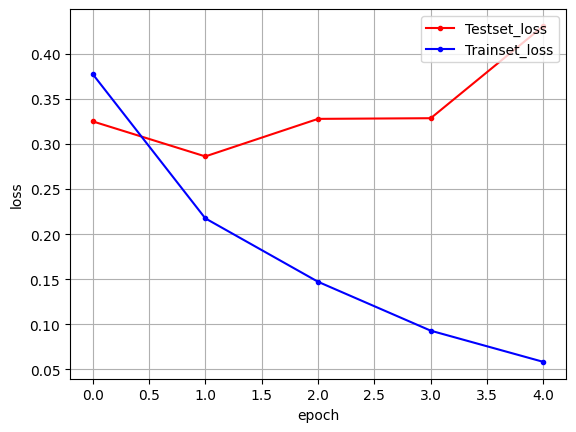

In [23]:
y_vloss = history.history['val_loss']  # save losses for both train and test sets
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()